In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

2024-04-11 04:46:53.575791: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 04:46:53.575915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 04:46:53.821110: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [4]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [24]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [25]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/brain-tumor-mri-dataset/Training',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/brain-tumor-mri-dataset/Testing',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [26]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [27]:
model.compile(
   optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

In [28]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
  2/179 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.4375 - loss: 1.8960

W0000 00:00:1712812023.816622      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8461 - loss: 0.4436

W0000 00:00:1712812038.572355      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712812039.767729      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


179/179 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.8465 - loss: 0.4426 - val_accuracy: 0.9390 - val_loss: 0.1714
Epoch 2/10


W0000 00:00:1712812042.810858      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


179/179 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.9658 - loss: 0.1026 - val_accuracy: 0.9657 - val_loss: 0.1092
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9878 - loss: 0.0563 - val_accuracy: 0.9680 - val_loss: 0.0920
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9898 - loss: 0.0381 - val_accuracy: 0.9535 - val_loss: 0.1282
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9947 - loss: 0.0247 - val_accuracy: 0.9771 - val_loss: 0.0676
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9941 - loss: 0.0253 - val_accuracy: 0.9733 - val_loss: 0.0764
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step - accuracy: 0.9949 - loss: 0.0199 - val_accuracy: 0.9786 - val_loss: 0.0689
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9978 - loss: 0.0127 - val_accuracy: 0.9725 - val_loss: 0.0711
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9967 - loss: 0.0115 - val_accurac

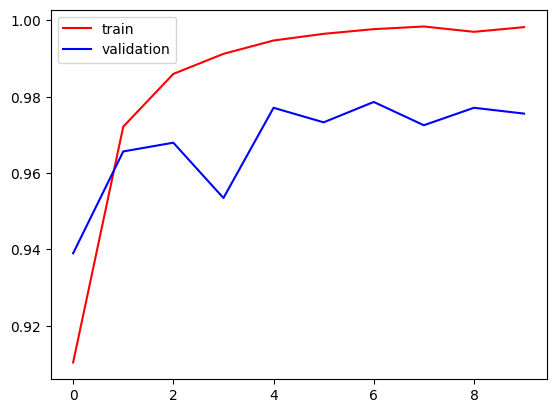

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

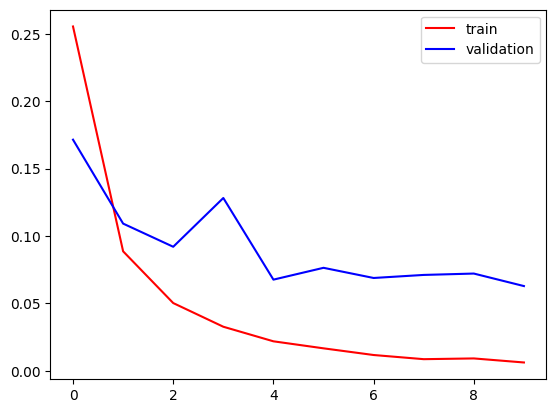

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [31]:
class_names=["glioma","meningioma","notumor","pituitary"]

In [44]:
for image_batch,label_batch in validation_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 150, 150, 3)
[0 1 3 0 1 3 0 1 3 3 0 2 2 1 0 2 3 0 0 0 1 2 3 2 0 1 3 3 3 0 0 1]


In [45]:
import numpy as np
for images_batch, labels_batch in validation_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    print("First Image to predict")
    print("Actual Label:",class_names[labels_batch[0].numpy()])
    
    batch_prediction=model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

First Image to predict
Actual Label: pituitary
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label: pituitary
